In [1]:
#importing required liberaies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#uploading dataset
df=pd.read_csv("^NSEI.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-14,16633.699219,16887.949219,16606.500000,16871.300781,16871.300781,314700
1,2022-03-15,16900.650391,16927.750000,16555.000000,16663.000000,16663.000000,381600
2,2022-03-16,16876.650391,16987.900391,16837.849609,16975.349609,16975.349609,260000
3,2022-03-17,17202.900391,17344.599609,17175.750000,17287.050781,17287.050781,448300
4,2022-03-21,17329.500000,17353.349609,17096.400391,17117.599609,17117.599609,285500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,17351.950006,17436.611312,17244.494326,17343.155041,17343.155041,272272.983871
std,830.732489,816.882354,836.370929,829.347640,829.347640,73611.332107
min,15272.650391,15382.500000,15183.400391,15293.500000,15293.500000,0.000000
25%,16840.575195,16947.162598,16644.874511,16793.437011,16793.437011,227575.000000
50%,17533.049805,17643.000000,17434.625000,17532.799804,17532.799804,260000.000000
75%,17955.800781,18049.850098,17852.450683,17947.312500,17947.312500,300725.000000
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,651600.000000


In [6]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df.index=pd.to_datetime(df["Date"])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 248 entries, 2022-03-14 to 2023-03-10
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       248 non-null    object 
 1   Open       248 non-null    float64
 2   High       248 non-null    float64
 3   Low        248 non-null    float64
 4   Close      248 non-null    float64
 5   Adj Close  248 non-null    float64
 6   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 15.5+ KB


In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2022-03-14,2022-03-14,16633.699219,16887.949219,16606.500000,16871.300781,16871.300781,314700
2022-03-15,2022-03-15,16900.650391,16927.750000,16555.000000,16663.000000,16663.000000,381600
2022-03-16,2022-03-16,16876.650391,16987.900391,16837.849609,16975.349609,16975.349609,260000
2022-03-17,2022-03-17,17202.900391,17344.599609,17175.750000,17287.050781,17287.050781,448300
2022-03-21,2022-03-21,17329.500000,17353.349609,17096.400391,17117.599609,17117.599609,285500


In [10]:
df.drop("Date",inplace=True,axis=1)

In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [12]:
df.drop(["Adj Close","Volume"],axis=1,inplace=True)

In [13]:
df.head()

,Open,High,Low,Close
Date,,,,
2022-03-14,16633.699219,16887.949219,16606.500000,16871.300781
2022-03-15,16900.650391,16927.750000,16555.000000,16663.000000
2022-03-16,16876.650391,16987.900391,16837.849609,16975.349609
2022-03-17,17202.900391,17344.599609,17175.750000,17287.050781
2022-03-21,17329.500000,17353.349609,17096.400391,17117.599609


<AxesSubplot:xlabel='Date'>

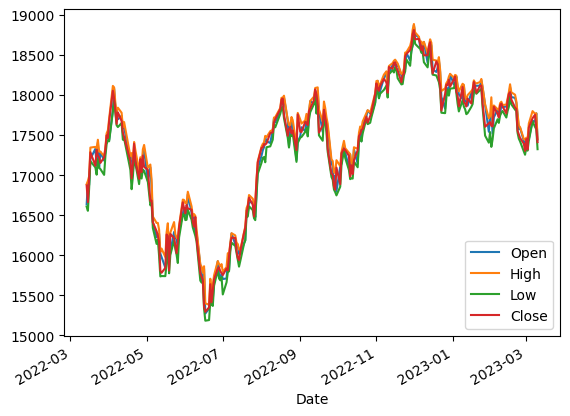

In [14]:
df.plot()

<AxesSubplot:>

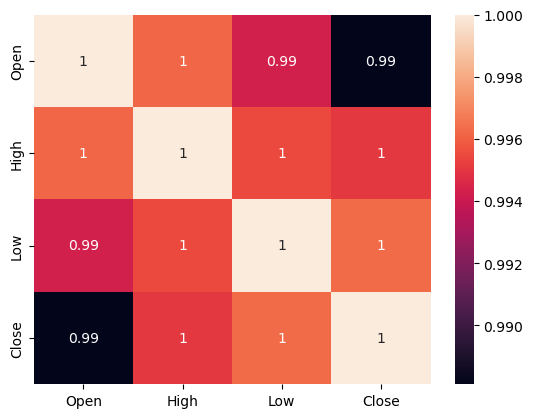

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
#scaling
minmax=MinMaxScaler()
scaled_set=minmax.fit_transform(df)

In [18]:
#creating dataset into sequence
def series_to_sequence(data, n_in=1, n_out=1, dropnan=True): 
    n_vars = 1 if type(data) is list else data.shape[1] 
    df = pd.DataFrame(data) 
    cols, names = list(), list() 
    # creating input sequence (t, t+1, ... t+n)
    for i in range(n_in, 0, -1):  
        cols.append(df.shift(i))  
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)] 
    # forecast sequence (t, t+1, ... t+n) 
    for i in range(0, n_out):  
        cols.append(df.shift(-i))  
        if i == 0:   
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]  
        else:   
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)] 
    # put it all together 
    agg = pd.concat(cols, axis=1) 
    agg.columns = names 
    # drop rows with NaN values 
    if dropnan:  
        agg.dropna(inplace=True) 
    return agg 

In [19]:
n_past=4
n_features=4

In [20]:
data=series_to_sequence(scaled_set,n_past,1)

In [21]:
scaled_set

array([[0.37814277, 0.42950255, 0.3958774 , 0.44836624],
       [0.45231032, 0.44085766, 0.38155115, 0.38917306],
       [0.44564235, 0.45801848, 0.46023416, 0.47793396],
       [0.53628501, 0.55978427, 0.55423118, 0.56651059],
       [0.57145842, 0.56228063, 0.53215773, 0.51835738],
       [0.51336388, 0.55687444, 0.50709385, 0.57459506],
       [0.59244883, 0.58768669, 0.56086566, 0.55474578],
       [0.50629273, 0.54470635, 0.53069729, 0.54823814],
       [0.56020622, 0.54560515, 0.52663598, 0.52841716],
       [0.53043643, 0.52854407, 0.50642611, 0.54802501],
       [0.56248423, 0.55951345, 0.57090784, 0.57738016],
       [0.60997992, 0.610539  , 0.61305206, 0.62652742],
       [0.62416291, 0.62118086, 0.62640469, 0.61700767],
       [0.60129767, 0.66223488, 0.62292744, 0.67546156],
       [0.70470648, 0.77947867, 0.72549261, 0.78428542],
       [0.78013784, 0.77400061, 0.76169781, 0.75700494],
       [0.71405563, 0.71852452, 0.72227942, 0.71445024],
       [0.68086883, 0.68614313,

In [22]:
data

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
4,0.378143,0.429503,0.395877,0.448366,0.452310,0.440858,0.381551,0.389173,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357
5,0.452310,0.440858,0.381551,0.389173,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595
6,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746
7,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746,0.506293,0.544706,0.530697,0.548238
8,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746,0.506293,0.544706,0.530697,0.548238,0.560206,0.545605,0.526636,0.528417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0.598991,0.590311,0.588517,0.596533,0.586392,0.587130,0.576332,0.571313,0.579960,0.594919,0.601383,0.613072,0.597019,0.588657,0.590464,0.576414,0.605284,0.645417,0.624318,0.653836
244,0.586392,0.587130,0.576332,0.571313,0.579960,0.594919,0.601383,0.613072,0.597019,0.588657,0.590464,0.576414,0.605284,0.645417,0.624318,0.653836,0.668936,0.689695,0.692264,0.687113
245,0.579960,0.594919,0.601383,0.613072,0.597019,0.588657,0.590464,0.576414,0.605284,0.645417,0.624318,0.653836,0.668936,0.689695,0.692264,0.687113,0.664879,0.680152,0.672875,0.699318
246,0.597019,0.588657,0.590464,0.576414,0.605284,0.645417,0.624318,0.653836,0.668936,0.689695,0.692264,0.687113,0.664879,0.680152,0.672875,0.699318,0.694413,0.681821,0.664905,0.652486


In [23]:
#spliting training and testing set
train_size=int(len(data)*0.7)
test_size=len(data)-train_size
train,test=data.iloc[0:train_size,:],data.iloc[train_size:len(data),:]

In [24]:
train.head()

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
4,0.378143,0.429503,0.395877,0.448366,0.452310,0.440858,0.381551,0.389173,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357
5,0.452310,0.440858,0.381551,0.389173,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595
6,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746
7,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746,0.506293,0.544706,0.530697,0.548238
8,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746,0.506293,0.544706,0.530697,0.548238,0.560206,0.545605,0.526636,0.528417


In [25]:
n_cols = n_past * n_features
train_X,train_Y = train.iloc[:,:n_cols],train.iloc[:,n_cols:]
test_X,test_Y = test.iloc[:,:n_cols],test.iloc[:,n_cols:]

In [26]:
train_X

,var1(t-4),var2(t-4),var3(t-4),var4(t-4),var1(t-3),var2(t-3),var3(t-3),var4(t-3),var1(t-2),var2(t-2),var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1)
4,0.378143,0.429503,0.395877,0.448366,0.452310,0.440858,0.381551,0.389173,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511
5,0.452310,0.440858,0.381551,0.389173,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357
6,0.445642,0.458018,0.460234,0.477934,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595
7,0.536285,0.559784,0.554231,0.566511,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746
8,0.571458,0.562281,0.532158,0.518357,0.513364,0.556874,0.507094,0.574595,0.592449,0.587687,0.560866,0.554746,0.506293,0.544706,0.530697,0.548238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.862321,0.860731,0.870146,0.862646,0.858528,0.868862,0.861967,0.883745,0.868391,0.872914,0.879256,0.885522,0.857403,0.865910,0.870577,0.866837
170,0.858528,0.868862,0.861967,0.883745,0.868391,0.872914,0.879256,0.885522,0.857403,0.865910,0.870577,0.866837,0.864140,0.859348,0.841883,0.856536
171,0.868391,0.872914,0.879256,0.885522,0.857403,0.865910,0.870577,0.866837,0.864140,0.859348,0.841883,0.856536,0.826203,0.821603,0.820616,0.814564
172,0.857403,0.865910,0.870577,0.866837,0.864140,0.859348,0.841883,0.856536,0.826203,0.821603,0.820616,0.814564,0.807518,0.821474,0.821826,0.838505


In [27]:
train_Y

,var1(t),var2(t),var3(t),var4(t)
4,0.571458,0.562281,0.532158,0.518357
5,0.513364,0.556874,0.507094,0.574595
6,0.592449,0.587687,0.560866,0.554746
7,0.506293,0.544706,0.530697,0.548238
8,0.560206,0.545605,0.526636,0.528417
...,...,...,...,...
169,0.864140,0.859348,0.841883,0.856536
170,0.826203,0.821603,0.820616,0.814564
171,0.807518,0.821474,0.821826,0.838505
172,0.848095,0.839605,0.851953,0.845055


In [28]:
train_X, train_Y = np.array(train_X), np.array(train_Y)
test_X, test_Y = np.array(test_X), np.array(test_Y)

In [29]:
train_X = train_X.reshape((train_X.shape[0],n_past,n_features))
test_X = test_X.reshape((test_X.shape[0],n_past,n_features))
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

(170, 4, 4) (170, 4)
(74, 4, 4) (74, 4)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn.metrics import mean_squared_error

In [31]:
#training model with LSTM method
model = Sequential()
model.add(LSTM(200, input_shape=(n_past,n_features), activation='relu', return_sequences=True))
model.add(LSTM(200, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_features))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['mean_squared_error'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4, 200)            164000    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 4)                 804       
                                                                 
Total params: 485,604
Trainable params: 485,604
Non-trainable params: 0
_________________________________________________________________


In [33]:
history = model.fit(train_X, train_Y,validation_data=(test_X, test_Y),epochs=100, batch_size=128, verbose=2)

Epoch 1/100
2/2 - 3s - loss: 0.2969 - mean_squared_error: 0.2969 - val_loss: 0.5641 - val_mean_squared_error: 0.5641 - 3s/epoch - 1s/step
Epoch 2/100
2/2 - 0s - loss: 0.2736 - mean_squared_error: 0.2736 - val_loss: 0.5211 - val_mean_squared_error: 0.5211 - 101ms/epoch - 50ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2512 - mean_squared_error: 0.2512 - val_loss: 0.4707 - val_mean_squared_error: 0.4707 - 99ms/epoch - 49ms/step
Epoch 4/100
2/2 - 0s - loss: 0.2248 - mean_squared_error: 0.2248 - val_loss: 0.4060 - val_mean_squared_error: 0.4060 - 100ms/epoch - 50ms/step
Epoch 5/100
2/2 - 0s - loss: 0.1907 - mean_squared_error: 0.1907 - val_loss: 0.3230 - val_mean_squared_error: 0.3230 - 101ms/epoch - 51ms/step
Epoch 6/100
2/2 - 0s - loss: 0.1493 - mean_squared_error: 0.1493 - val_loss: 0.2197 - val_mean_squared_error: 0.2197 - 100ms/epoch - 50ms/step
Epoch 7/100
2/2 - 0s - loss: 0.1000 - mean_squared_error: 0.1000 - val_loss: 0.1049 - val_mean_squared_error: 0.1049 - 115ms/epoch - 58ms/step
Epoch

Epoch 59/100
2/2 - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0026 - val_mean_squared_error: 0.0026 - 85ms/epoch - 43ms/step
Epoch 60/100
2/2 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - 84ms/epoch - 42ms/step
Epoch 61/100
2/2 - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0028 - val_mean_squared_error: 0.0028 - 81ms/epoch - 41ms/step
Epoch 62/100
2/2 - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0037 - val_mean_squared_error: 0.0037 - 100ms/epoch - 50ms/step
Epoch 63/100
2/2 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0034 - val_mean_squared_error: 0.0034 - 84ms/epoch - 42ms/step
Epoch 64/100
2/2 - 0s - loss: 0.0070 - mean_squared_error: 0.0070 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - 83ms/epoch - 42ms/step
Epoch 65/100
2/2 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0025 - val_mean_squared_error: 0.0025 - 84ms/epoch - 42ms/ste

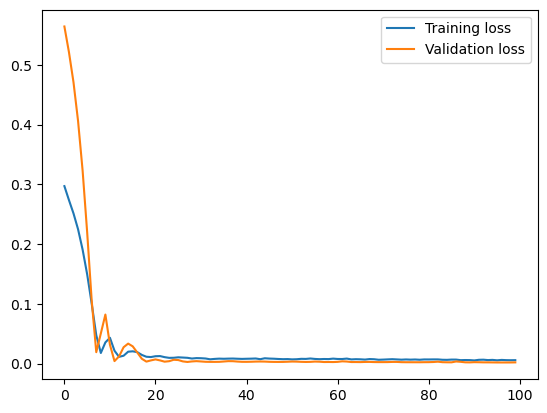

In [34]:

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [35]:
ypred = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_past*n_features))

3/3 [==============================] - 0s 8ms/step


In [36]:
ypred

array([[0.86142373, 0.8669299 , 0.8645508 , 0.8644942 ],
       [0.8890871 , 0.8945318 , 0.89310706, 0.8929626 ],
       [0.907205  , 0.91258395, 0.9115151 , 0.91187626],
       [0.9271258 , 0.9324186 , 0.9318621 , 0.93242794],
       [0.95604587, 0.96116066, 0.9616964 , 0.9622872 ],
       [0.9858378 , 0.9908385 , 0.99214494, 0.99267966],
       [0.99593985, 1.0008352 , 1.0022953 , 1.0035499 ],
       [0.9858235 , 0.99102247, 0.9915259 , 0.9934563 ],
       [0.97696507, 0.9824331 , 0.98277473, 0.9848202 ],
       [0.96052206, 0.9659591 , 0.9658501 , 0.9675015 ],
       [0.95257753, 0.95794487, 0.9576651 , 0.9592299 ],
       [0.94403   , 0.9494519 , 0.9487846 , 0.95007885],
       [0.92499685, 0.9307104 , 0.9292406 , 0.93085825],
       [0.9246631 , 0.9301933 , 0.9289241 , 0.9302747 ],
       [0.9463943 , 0.9516901 , 0.95151615, 0.95217896],
       [0.9394295 , 0.94476324, 0.9444212 , 0.945199  ],
       [0.90591764, 0.9117816 , 0.9096942 , 0.9113775 ],
       [0.8833288 , 0.88920283,

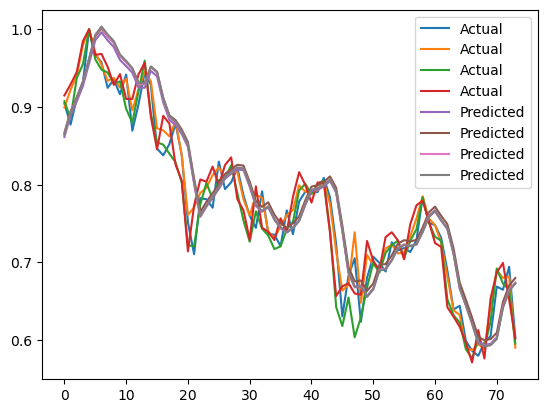

In [37]:
plt.plot(test_Y[:100],label="Actual")
plt.plot(ypred[:100],label="Predicted")
plt.legend()